## Imports

In [103]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from pandas import DataFrame
import pickle
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# LINEAR REG
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Over-sampling for imbalance problem
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

## Pre-process data

In [111]:
os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
raw_data=pd.read_csv('Data_All_sorted_alpha_MVP_V6.csv')

#raw_data.index = raw_data.Neighbourhood

Y = pd.DataFrame(raw_data['Future_change_low_income_pop'])
Y=Y*100

# Features selections

# options -: All fesstures:
# X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
#                            'Change in low income pop','Total Area','Total Population',\
#                            'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
#                            'Social Housing Units','Rent Bank Applicants']])

# options -2: High correlation features
X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
                             'Change in low income pop','Total Population',\
                             'Pop  25 - 34 years','TTC Stops','Health Providers','Businesses',\
                             'Social Housing Units']])

# options -3: Highest correlation features
# X = pd.DataFrame(raw_data[['Change in low income pop',\
#                            'Pop  25 - 34 years','Businesses',\
#                            'Social Housing Units']])

# Resampling for imbalance
X_resampled, y_resampled = SMOTE().fit_resample(X, Y)
#print(sorted(Counter(y_resampled).items()))

#Split Test Train Data
    #if original data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 44)

    #if resampled data:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size = 0.1, random_state = 44)


# #Method -2 : Stratified
# split = StratifiedShuffleSplit(n_splits=1, test_size=.15, random_state=44) # split is to classify for stratify
# for train_index, test_index in split.split(raw_data, raw_data[['Label']]):  # column to use to stratify
#     X_train = X.loc[train_index]
#     X_test = X.loc[test_index]
#     Y_train = Y.loc[train_index]
#     Y_test = Y.loc[test_index]

#Standardize the Data:
#X_train = pd.DataFrame(StandardScaler().fit_transform(X_train)) 
#X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))



/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got continuous instead.
  TARGET_KIND, type_of_target(y)))
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modeling

In [112]:
# Linear Modelling 

#Option-1 :
lmodel = LinearRegression()
#Option-2 :
#lmodel=RidgeCV()
lmodel.fit(X_train, Y_train)

# save the model to disk
# predictive_model_1 = 'finalized_lmodel.sav'
# pickle.dump(lmodel, open(predictive_model_1, 'wb'))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predictions

In [113]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
y_pred_lm= lmodel.predict(X_test)
y_pred_train_lm=lmodel.predict(X_train)

Error = np.abs(Y_test - y_pred_lm)#/np.abs(Y_test)
print("Error : in "+str(np.mean(Error)))

rms_LR = np.sqrt(mean_squared_error(Y_test, y_pred_lm))
print("RMS ="+str(rms_LR))

rr_TRAIN = metrics.r2_score(Y_train, y_pred_train_lm)
rr_TRAIN = round(rr_TRAIN,2)
print("R-Squared-TRAIN ="+str(rr_TRAIN))

rr_TEST = metrics.r2_score(Y_test, y_pred_lm)
rr_TEST = round(rr_TEST,2)
print("R-Squared-TEST ="+str(rr_TEST))

Error : in 7.555486592609097
RMS =12.613427967112845
R-Squared-TRAIN =0.37
R-Squared-TEST =0.77


## Visualisation

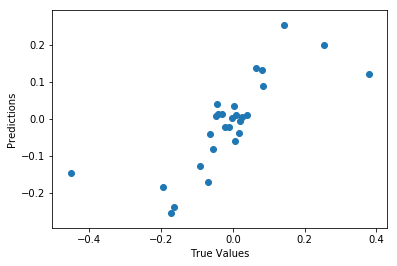

28
[ 0.37876526  0.02123949 -0.45076037 -0.05555881  0.25483138  0.00924145
 -0.03093507 -0.16299477 -0.19539112 -0.01117241  0.08269536  0.02457477
  0.03903554 -0.04236975 -0.06827037 -0.02129834  0.00620754 -0.00146681
 -0.06294937 -0.04357143 -0.04660491  0.00352334  0.01701088 -0.09061936
 -0.17077068  0.14156827  0.08425797  0.06509634]


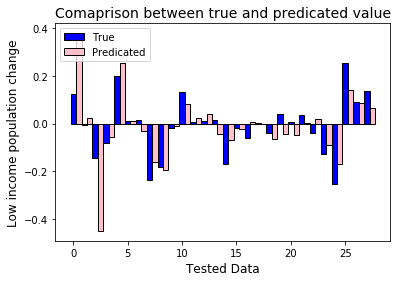

In [96]:
## The line / model
plt.scatter(Y_test, y_pred_lm)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')
plt.show()
print(len(y_pred_lm))
print(Y_test)
y_pred_lm_4plt = pd.DataFrame(y_pred_lm.tolist())
#df['Future_change_low_income_pop'] = pd.DataFrame(y_pred_lm)
y_pred_lm_4plt.columns = ['Future_change_low_income_pop']

y_test_4plt = pd.DataFrame(Y_test.tolist())
#df['Future_change_low_income_pop'] = pd.DataFrame(y_pred_lm)
y_test_4plt.columns = ['Future_change_low_income_pop']

Data_list=['Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data'\
      ,'Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data'\
          ,'Data','Data']
Coparison=['True','Predicated']
pos = np.arange(len(Data_list))
bar_width = 0.5
PredictoinValues=y_pred_lm_4plt['Future_change_low_income_pop'] #[60,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,100,100]
TestValues=y_test_4plt['Future_change_low_income_pop'] #[30,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,20,33]


plt.bar(pos,PredictoinValues,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,TestValues,bar_width,color='pink',edgecolor='black')
#plt.xticks(pos, Data_list)
plt.xlabel('Tested Data', fontsize=12)
plt.ylabel('Low income population change', fontsize=12)
plt.title('Comaprison between true and predicated value',fontsize=14)
plt.legend(Coparison,loc=2)
plt.show()

# print(y_pred)
# print(Y_test)

RMS =[ 0.85295817  1.90275557  0.8568162   1.45159986  0.8167196   3.21706525
  0.5589819  10.77664896  2.19987238  0.46439917  1.42537397  0.57158109
  0.95102944  1.05185669 71.52747562  0.84567199  1.11550227  1.4115719
  3.3137927   6.69808101  0.43469875  0.54345917  0.21457619  1.20661463
  0.45961589  0.72687614  1.27555962  4.72520072]
Error Percentage:4.342726958665602
95.65727304133439
RMS =15.8205967200121


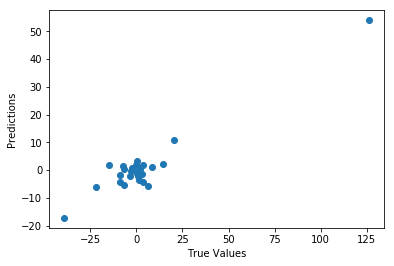

In [27]:
y_pred_lm= lmodel.predict(X_test)
# y_pred_LR= LR_model.predict(X_test)
# y_pred_lm= pd.DataFrame(y_pred_lm).asarray()


rms_LM = np.sqrt(mean_squared_error(Y_test, y_pred_lm))

Error_precentage = np.abs(Y_test - y_pred_lm)/np.abs(Y_test)
#print(Y_test , y_pred_lm)
print("RMS ="+str(Error_precentage))
print("Error Percentage:"+str(np.mean(Error_precentage)))
print(100-np.mean(Error_precentage))

# rms_LR = np.sqrt(mean_squared_error(Y_test, y_pred_LR))

print("RMS ="+str(rms_LM))
# print("RMS ="+str(rms_LR))


## The line / model
plt.scatter(Y_test, y_pred_lm)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')


# import matplotlib.pyplot as plt
# y_pred_lm_4plt = pd.DataFrame(y_pred_lm.tolist())
# # df['Future_change_low_income_pop'] = pd.DataFrame(y_pred_lm)
# y_pred_lm_4plt.columns = ['Future_change_low_income_pop']

# Data_list=['Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data'\
#      ,'Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data','Data']
# Coparison=['True','Predicated']
# pos = np.arange(len(Data_list))
# bar_width = 0.5
# PredictoinValues=y_pred_lm_4plt['Future_change_low_income_pop'] #[60,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,40,70,65,85,90,100,100]
# TestValues=Y_test['Future_change_low_income_pop'] #[30,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,60,70,55,75,90,20,33]

# plt.bar(pos,PredictoinValues,bar_width,color='blue',edgecolor='black')
# plt.bar(pos+bar_width,TestValues,bar_width,color='pink',edgecolor='black')
# plt.xticks(pos, Data_list)
# plt.xlabel('Tested Data', fontsize=12)
# plt.ylabel('Low income population change', fontsize=12)
# plt.title('Comaprison between true and predicated value',fontsize=14)
# plt.legend(Coparison,loc=2)
# plt.show()

# print(y_pred)
# print(Y_test)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

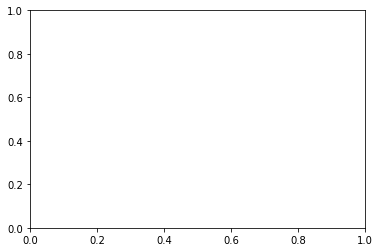

In [328]:
Y_test['Future_change_low_income_pop']
plt.bar(pos,Y_test['Future_change_low_income_pop'])
plt.show()

df = pd.DataFrame(y_pred_lm.tolist())
# df['Future_change_low_income_pop'] = pd.DataFrame(y_pred_lm)
df.columns = ['Future_change_low_income_pop']
plt.bar(pos,df['Future_change_low_income_pop'])

In [ ]:
y_pred_lm

In [ ]:
loaded_model = pickle.load(open('finalized_lmodel.sav', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

os.chdir('/Users/hadi/Documents/Professional_development/DS/INSIGHT/Project/Data/Data_pro')
Test_2016=pd.read_csv('Data_All_sorted_alpha_MVP_2016_V6.csv')

#print(pd.isna(Test_2016))

Test_2016.index = Test_2016.Neighbourhood
Y_2016 = pd.DataFrame(Test_2016['Future_change_low_income_pop'])
X_2016 = pd.DataFrame(Test_2016[['Home price','Change in housing pricing','Low income population',\
                           'Change in low income pop','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']])
# pd.isna(X_2016)


Y_2016 = loaded_model.predict(X_2016)

#Y_2016.index = Y_2016.Neighbourhood
neighb_name='Agincourt-North'

for i in range(0,137):
    if Test_2016.index[i]==neighb_name:
        indexnumber=i

print(Test_2016.index)
print(indexnumber)
print(Y_2016)
print(Y_2016[indexnumber])

#print(df.Y_2016[i])

from matplotlib import pyplot as plt
Goodlm=lm
y_pred = Goodlm.predict(X_test)
rms = np.sqrt(mean_squared_error(Y_test, y_pred))
# print(rms)
# print(y_pred)
# print(Y_test)

Error_precentage = np.abs(Y_test - y_pred_lm)/np.abs(y_pred_lm)
print(Error_precentage)


## The line / model
plt.scatter(Y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.savefig('testplot.png')


In [ ]:
import copy 
Goodlm=copy.deepcopy(lm)
Good_X_train_L_V2=copy.deepcopy(X_train) 
Good_X_test_L_V2=copy.deepcopy(X_test)
Good_Y_train_L_V2=copy.deepcopy(Y_train)  
Good_Y_test_L_V2=copy.deepcopy(Y_test)

In [3]:
import os
os.chdir('/Users/hadi/Documents/Professional development/DS/INSIGHT/Project/Data/Data_pro')
raw_data=pd.read_csv('Data_All_sorted_alpha_MVP_V5.csv')
raw_data.index = raw_data.Neighbourhood
Y = pd.DataFrame(raw_data['Future_change_low_income_pop'])
Y=Y*100
print (Y)
X = pd.DataFrame(raw_data[['Home price','Change in housing pricing','Low income population',\
                           'Change in low income pop','Total Area','Total Population',\
                           'Pop  25 - 34 years','Recent Immigrants','TTC Stops','Health Providers','Businesses',\
                           'Social Housing Units','Rent Bank Applicants']])

import altair as alt
import pandas as pd

source = raw_data.Future_change_low_income_pop
threshold = pd.DataFrame([{"threshold": 10}])

bars = alt.Chart(source).mark_bar().encode(x="year:O",y="wheat:Q")

highlight = alt.Chart(source).mark_bar(color="#e45755").encode(x='year:O',y='baseline:Q', y2='wheat:Q').transform_filter(alt.datum.wheat > 10).transform_calculate("baseline", "10")

rule = alt.Chart(threshold).mark_rule().encode(y='threshold:Q')

(bars + highlight + rule).properties(width=600)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hadi/Documents/Professional development/DS/INSIGHT/Project/Data/Data_pro'

In [88]:
print(X_test)

[[ 3.15540000e+05  4.97487103e-01  3.22900000e+04  1.96391844e-01
   3.28150000e+04  4.45500000e+03  2.29000000e+02  1.21000000e+02
   2.29100000e+03  1.24500000e+03  4.00000000e+00]
 [ 3.75361000e+05  4.81625774e-01  1.44850000e+04 -2.99276260e-02
   1.46500000e+04  2.88000000e+03  3.50000000e+01  5.90000000e+01
   5.70000000e+02  5.01000000e+02  3.00000000e+00]
 [ 5.08638000e+05  3.40563648e-01  2.10000000e+04  2.40000880e-02
   2.13000000e+04  4.63000000e+03  6.10000000e+01  2.70000000e+01
   2.54000000e+02  6.61000000e+02  1.00000000e+00]
 [ 3.92223000e+05  4.21648973e-01  1.62700000e+04 -1.31140980e-01
   1.66050000e+04  3.59500000e+03  4.00000000e+01  3.90000000e+01
   6.84000000e+02  8.78000000e+02  2.00000000e+00]
 [ 2.17258000e+05  3.69796855e-01  2.48000000e+04  7.06488304e-01
   2.54900000e+04  3.55000000e+03  1.03000000e+02  8.00000000e+01
   8.25000000e+02  5.08000000e+02  4.00000000e+00]
 [ 2.13308000e+05  3.80821989e-01  1.72700000e+04  1.24336092e-01
   1.73250000e+04  

In [92]:
print(pd.DataFrame(X_resampled))

           0         1        2         3        4        5      6      7   \
0    234855.0  0.383812  29880.0  0.000369  30160.0   3920.0   90.0   17.0   
1    245759.0  0.364585  21370.0 -0.038545  21565.0   2850.0  121.0   79.0   
2    252745.0  0.433282  11635.0 -0.012767  11655.0   1370.0   56.0   12.0   
3    592630.0  0.457992  26020.0  0.174658  27480.0   6760.0   86.0  192.0   
4    410468.0  0.475760  25000.0  0.056200  25435.0   2790.0  125.0   65.0   
5    308347.0  0.453391  14430.0 -0.013386  14945.0   1900.0   60.0   44.0   
6    563035.0  0.766678  14930.0  0.013973  15320.0   5060.0  103.0  179.0   
7    401024.0  0.366453  15265.0  0.116361  15370.0   2545.0   44.0  128.0   
8    379728.0  0.374357  12945.0 -0.201575  13295.0   1170.0   45.0   10.0   
9    514824.0  0.437879  21785.0  0.043075  21960.0   2195.0   76.0   45.0   
10   248970.0  0.419271   6280.0 -0.036953   6530.0    895.0   26.0    8.0   
11   217258.0  0.369797  24800.0  0.706488  25490.0   3550.0  10

[[2.34855000e+05 3.83811780e-01 2.98800000e+04 ... 2.95000000e+02
  7.70000000e+01 3.00000000e+00]
 [2.45759000e+05 3.64584837e-01 2.13700000e+04 ... 1.39900000e+03
  1.70000000e+02 3.00000000e+00]
 [2.52745000e+05 4.33282296e-01 1.16350000e+04 ... 3.12000000e+02
  8.50000000e+01 3.00000000e+00]
 ...
 [8.85067000e+05 3.39178367e-01 1.15300000e+04 ... 4.68000000e+02
  0.00000000e+00 3.00000000e+00]
 [2.98296000e+05 3.11767810e-01 2.72750000e+04 ... 2.64300000e+03
  5.11000000e+02 2.00000000e+00]
 [3.54842000e+05 3.40088372e-01 1.38200000e+04 ... 1.46800000e+03
  7.98000000e+02 3.00000000e+00]]
